<a href="https://colab.research.google.com/github/ed-ntim/Dask-tutorial-SA/blob/main/assessmentQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

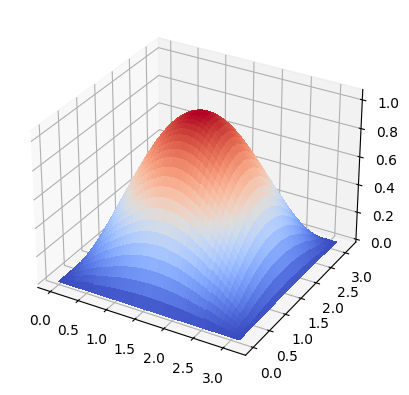

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

# Routine to solve lower triangular matrix
def solve_lower_triangular_matrix(A, b):
    n = A.shape[0]
    x = np.empty_like(b)

    for i in range(n):
        x[i] = b[i] / A[i, i]
        b[i + 1:] -= x[i] * A[i + 1:, i]

    return x

# Gauss-Seidel implementation using lower triangular solver with tolerance
def gauss_seidel(A, x, b, steps, tol=1e-6):
    n = A.shape[0]

    if x is None:
        x = np.zeros(n)

    Ls = np.tril(A)
    U = A - Ls

    for i in range(steps):
        x_new = solve_lower_triangular_matrix(Ls, b - U @ x)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new

    raise RuntimeError("Gauss-Seidel method did not converge within the maximum number of iterations")

# Define the domain
a, b = 0, np.pi
omega = (a, b)

# Define the grid
N = 128
x = np.linspace(omega[0], omega[1], N+1)
y = x
X, Y = np.meshgrid(x, y)

# Initialize the solution and forcing function
Uh = np.zeros((N+1, N+1))
f = -(2 * np.sin(X) * np.sin(Y))

# Set the boundary conditions
Uh[:, 0] = 0
Uh[:, -1] = 0
Uh[0, :] = 0
Uh[-1, :] = 0

# Finite Difference Discretization for the Poisson Problem
dx = (omega[1] - omega[0]) / N + 1
A_diag = np.ones((N+1) ** 2) * (-2 / (dx**2) - 2 / (dx**2))
A_offdiag = np.ones((N+1) ** 2 - 1) / (dx**2)
A_offdiag[np.arange(1, (N+1) ** 2) % (N+1) == 0] = 0  # Ensure zero on the boundaries

# Shape should be a tuple (N+1, N+1)
A_sparse = sp.diags([A_offdiag, A_diag, A_offdiag], [-1, 0, 1], shape=((N+1)**2, (N+1)**2), format='csr')

# Reshape the right-hand side vector for the linear system
F = f.flatten()

# Call the Gauss-Seidel solver with tolerance
initial_guess = np.zeros_like(Uh.flatten())  # Use a different initial guess
coefficients = gauss_seidel(A_sparse.toarray(), initial_guess, F, steps=1000, tol=1e-6)

# Reshape the solution vector to a 2D grid
Uh = coefficients.reshape((N+1, N+1))

# Calculate the exact solution
u_exact = np.sin(X) * np.sin(Y)

# Plot the solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Uh, cmap=cm.coolwarm, linewidth=0, antialiased=False)

plt.show()


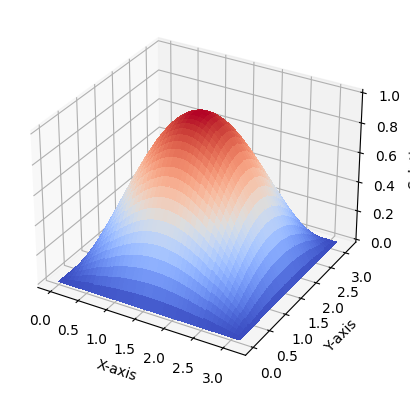

In [ ]:
# Plot of the exact solution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the exact solution
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u_exact, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Solution')

plt.show()

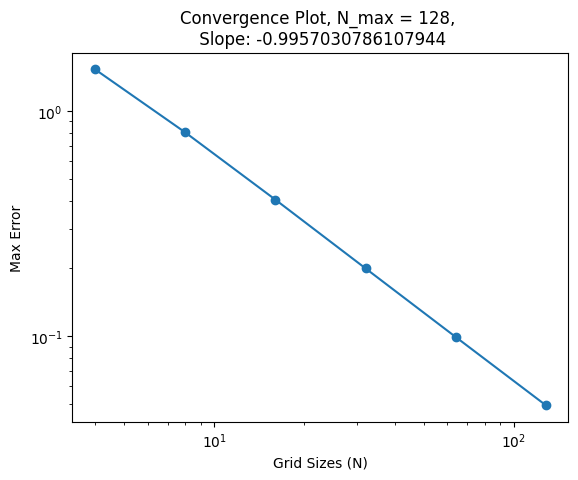

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

# Routine to solve lower triangular matrix
def solve_lower_triangular_matrix(A, b):
    n = A.shape[0]
    x = np.empty_like(b)

    for i in range(n):
        x[i] = b[i] / A[i, i]
        b[i + 1:] -= x[i] * A[i + 1:, i]

    return x

# Gauss-Seidel implementation using lower triangular solver
def gauss_seidel(A, x, b, steps, tol=1e-6):
    n = A.shape[0]

    if x is None:
        x = np.zeros(n)

    Ls = np.tril(A)
    U = A - Ls

    for i in range(steps):
        x_new = solve_lower_triangular_matrix(Ls, b - U @ x)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new

    raise RuntimeError("Gauss-Seidel method did not converge within the maximum number of iterations")

# Function to calculate the exact solution
def exact_solution(x, y):
    return np.sin(x) * np.sin(y)

# Function to calculate the forcing function
def forcing_function(x, y):
    return -(2 * np.sin(x) * np.sin(y))

# Function to calculate the max error
def calculate_max_error(Uh, u_exact):
    return np.max(np.abs(Uh - u_exact))

# Lists to store N values and corresponding max errors
N_values = [4, 8, 16, 32, 64, 128, 256, 512]
max_errors = []

# Loop over N values
for N in N_values:
    # Define the domain
    a, b = 0, np.pi
    omega = (a, b)

    # Define the grid
    x = np.linspace(omega[0], omega[1], N+1)
    y = x
    X, Y = np.meshgrid(x, y)

    # Initialize the solution and forcing function
    Uh = np.zeros((N+1, N+1))
    f = forcing_function(X, Y)

    # Set the boundary conditions
    Uh[:, 0] = 0
    Uh[:, -1] = 0
    Uh[0, :] = 0
    Uh[-1, :] = 0

    # Finite Difference Discretization for the Poisson Problem
    dx = (omega[1] - omega[0]) / N + 1
    A_diag = np.ones((N+1) ** 2) * (-2 / (dx**2) - 2 / (dx**2))
    A_offdiag = np.ones((N+1) ** 2 - 1) / (dx**2)
    A_offdiag[np.arange(1, (N+1) ** 2) % (N+1) == 0] = 0

    # Shape should be a tuple (N+1, N+1)
    A_sparse = sp.diags([A_offdiag, A_diag, A_offdiag], [-1, 0, 1], shape=((N+1)**2, (N+1)**2), format='csr')

    # Reshape the right-hand side vector for the linear system
    F = f.flatten()

    # Call the Gauss-Seidel solver with tolerance
    initial_guess = np.zeros_like(Uh.flatten())
    coefficients = gauss_seidel(A_sparse.toarray(), initial_guess, F, steps=1000, tol=1e-6)

    # Reshape the solution vector to a 2D grid
    Uh = coefficients.reshape((N+1, N+1))

    # Calculate the exact solution
    u_exact = exact_solution(X, Y)

    # Calculate the max error
    max_err = calculate_max_error(Uh, u_exact)
    max_errors.append(max_err)

# Perform linear fit to calculate the slope
coefficients = np.polyfit(np.log(N_values), np.log(max_errors), 1)
slope = coefficients[0]


# Plot the log-log plot of error vs N
plt.figure()
plt.loglog(N_values, max_errors, marker='o')
plt.xlabel('Grid Sizes (N)')
plt.ylabel('Max Error')
plt.title(f'Convergence Plot, N_max = 128, \n Slope: {slope}')
plt.show()


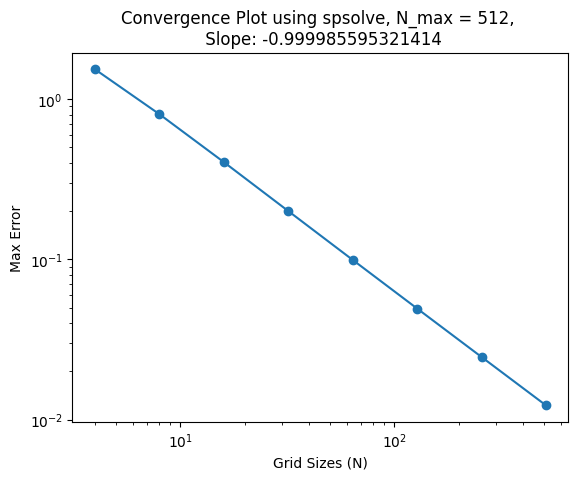

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve

# Routine to solve lower triangular matrix
def solve_lower_triangular_matrix(A, b):
    n = A.shape[0]
    x = np.empty_like(b)

    for i in range(n):
        x[i] = b[i] / A[i, i]
        b[i + 1:] -= x[i] * A[i + 1:, i]

    return x

# Gauss-Seidel implementation using lower triangular solver
def gauss_seidel(A, x, b, steps, tol=1e-6):
    n = A.shape[0]

    if x is None:
        x = np.zeros(n)

    Ls = np.tril(A)
    U = A - Ls

    for i in range(steps):
        x_new = solve_lower_triangular_matrix(Ls, b - U @ x)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new

    raise RuntimeError("Gauss-Seidel method did not converge within the maximum number of iterations")

# Function to calculate the exact solution
def exact_solution(x, y):
    return np.sin(x) * np.sin(y)

# Function to calculate the forcing function
def forcing_function(x, y):
    return -(2 * np.sin(x) * np.sin(y))

# Function to calculate the max error
def calculate_max_error(Uh, u_exact):
    return np.max(np.abs(Uh - u_exact))

# Lists to store N values and corresponding max errors
N_values = [4, 8, 16, 32, 64, 128, 256, 512]
max_errors = []

# Loop over N values
for N in N_values:
    # Define the domain
    a, b = 0, np.pi
    omega = (a, b)

    # Define the grid
    x = np.linspace(omega[0], omega[1], N+1)
    y = x
    X, Y = np.meshgrid(x, y)

    # Initialize the solution and forcing function
    Uh = np.zeros((N+1, N+1))
    f = forcing_function(X, Y)

    # Set the boundary conditions
    Uh[:, 0] = 0
    Uh[:, -1] = 0
    Uh[0, :] = 0
    Uh[-1, :] = 0

    # Finite Difference Discretization for the Poisson Problem
    dx = (omega[1] - omega[0]) / N + 1
    A_diag = np.ones((N+1) ** 2) * (-2 / (dx**2) - 2 / (dx**2))
    A_offdiag = np.ones((N+1) ** 2 - 1) / (dx**2)
    A_offdiag[np.arange(1, (N+1) ** 2) % (N+1) == 0] = 0

    # Shape should be a tuple (N+1, N+1)
    A_sparse = sp.diags([A_offdiag, A_diag, A_offdiag], [-1, 0, 1], shape=((N+1)**2, (N+1)**2), format='csr')

    # Reshape the right-hand side vector for the linear system
    F = f.flatten()

    # Call spsolve instead of the Gauss-Seidel solver for N > 128 to solve the linear system
    coefficients = spsolve(A_sparse, F)

    # Reshape the solution vector to a 2D grid
    Uh = coefficients.reshape((N+1, N+1))

    # Calculate the exact solution
    u_exact = exact_solution(X, Y)

    # Calculate the max error
    max_err = calculate_max_error(Uh, u_exact)
    max_errors.append(max_err)

# Perform linear fit to calculate the slope
coefficients = np.polyfit(np.log(N_values), np.log(max_errors), 1)
slope = coefficients[0]


# Plot the log-log plot of error vs N
plt.figure()
plt.loglog(N_values, max_errors, marker='o')
plt.xlabel('Grid Sizes (N)')
plt.ylabel('Max Error')
plt.title(f'Convergence Plot using spsolve, N_max = 512, \n Slope: {slope}')
plt.show()


## Convergence Behavior Observed
 Convergence is often indicated by a reduction in the error as the grid is refined.
The convergence rate of the Gauss-Seidel iterative linear solver can be seen from the log-log plot of the maximum error against the grid size (`N_values`).
It exhibited a straight line with a negative slope (-0.9957030).
The convergence of the spsolve algorithm was adapted for `N_values` > 128, and a similar slope (-0.9999855) was obtained.  

Theoretical analysis often predicts that the error (e) and grid size (h) are related by a power-law expression of the form:

$ e \propto h^p $

In a log-log plot, this relationship becomes linear:

$ \log(e) = p \cdot \log(h) + c $

where:
- \( p \) is the convergence rate (slope of the line),
- \( h \) is the grid size, and
- \( c \) is a constant.

The slope of this line provides information about the order of convergence. Specifically:

- If the slope is close to 1, the method is first-order convergent.
- If the slope is close to 2, the method is second-order convergent.
- If the slope is close to 3, the method is third-order convergent, and so on.

The numerical method is converging as expected, the log-log plot gave a straight line, and the slope of this line is close to 1. Hence the the order of convergence of the Gauss-Seidel solver implemented in the code above can be described as first order, however with the possibility of introducing memory constraints on large sparse matrices.
